# Pneumonia detector:

## Overview :

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing 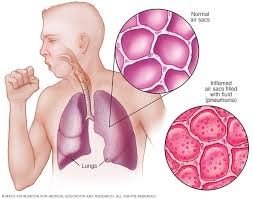

Provided by data from https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray, i tried to make a detector model for this illness using the Chest X-ray images like these :
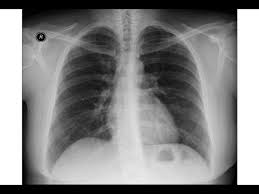

I must note that this project is for educational pusposed, more precisely to get more familiar with Keras :)

Connecting to google drive where the data is located:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Importing libraries :

In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers
from keras import applications
from keras.optimizers import Adam
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import keras
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split


## Data Importing and Preprocessing :

###### Importing target Data :

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/pneumonia detection/images/All/GTruth.csv')
df.head()


,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


In [0]:
#Number of classes
df['Ground_Truth'].value_counts()

1    4273
0    1583
Name: Ground_Truth, dtype: int64

Transforming the dataframe df into a dictionary :

In [0]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))

#### Loading images into RAM :

Reading Image data and converting it into pixels and separating class labels :


In [0]:
Data=[]
Label=[]
directory='/content/drive/My Drive/Colab Notebooks/pneumonia detection/images/All/'
for filename in os.listdir(directory) :
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue

Splitting Data into train/validation/test:

In [0]:
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(Label), test_size=0.2, random_state=42,stratify=Label)
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)
print("X_train.shape = ",X_train.shape)
print("X_test.shape = ",X_test.shape)
print("X_val.shape = ",X_val.shape)


X_train.shape =  (4684, 224, 224, 3)
X_test.shape =  (235, 224, 224, 3)
X_val.shape =  (937, 224, 224, 3)


In [0]:
img_width=224
img_height=224

In [0]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_val=X_val.reshape(X_val.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_val=X_val.reshape(X_val.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
   

In [0]:
del Data ,X_1,y_1 # To save memory 

## Model Defining:

In [0]:
#Variables defined
epoch=30
batch=16
num_classes=1


In [0]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape,
                kernel_initializer='he_normal'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid',kernel_initializer='glorot_normal'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)            

## Model training :

In [0]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

his=model.fit(X_train,y_train,batch_size=batch,
              epochs=epoch,verbose=1,
              validation_data=(X_val,y_val))

Train on 4684 samples, validate on 937 samples
Epoch 1/30
4684/4684 [==============================] - 10s 2ms/step - loss: 0.7400 - acc: 0.6298 - val_loss: 0.5792 - val_acc: 0.7300
Epoch 2/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.6357 - acc: 0.6979 - val_loss: 0.6150 - val_acc: 0.7300
Epoch 3/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.6087 - acc: 0.7094 - val_loss: 0.5590 - val_acc: 0.7300
Epoch 4/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.4355 - acc: 0.7897 - val_loss: 0.5721 - val_acc: 0.7385
Epoch 5/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.2622 - acc: 0.8928 - val_loss: 0.2771 - val_acc: 0.9125
Epoch 6/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.2230 - acc: 0.9086 - val_loss: 0.2001 - val_acc: 0.9200
Epoch 7/30
4684/4684 [==============================] - 8s 2ms/step - loss: 0.1976 - acc: 0.9257 - val_loss: 0.1624 - val_acc: 0.9445
Epoch 8/30
468

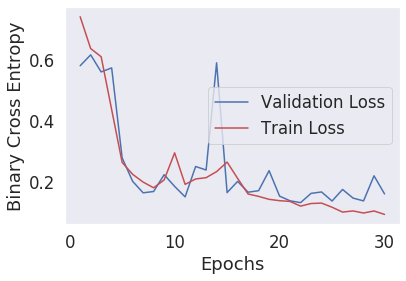

In [0]:
#Plotting Train and Validation Loss
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross Entropy')

x=list(range(1,epoch+1))

vy=his.history['val_loss']
ty=his.history['loss']
ax.plot(x,vy,'b',label='Validation Loss')
ax.plot(x,ty,'r',label='Train Loss')
plt.legend()
plt.grid()
fig.canvas.draw()

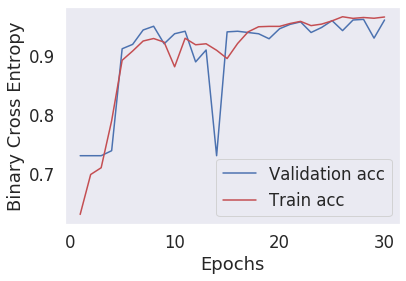

In [0]:
#Plotting Train and Validation Loss
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Binary Cross Entropy')

x=list(range(1,epoch+1))

vy=his.history['val_acc']
ty=his.history['acc']
ax.plot(x,vy,'b',label='Validation acc')
ax.plot(x,ty,'r',label='Train acc')
plt.legend()
plt.grid()
fig.canvas.draw()

## Evaluation :

In [0]:
score=model.evaluate(X_test,y_test,verbose=0)
print("The test accuracy for the model is %f "%(score[1]*100))

The test accuracy for the model is 97.872341 


Confusion Matrix :


Text(0.5, 1, 'Confusion Matrix')

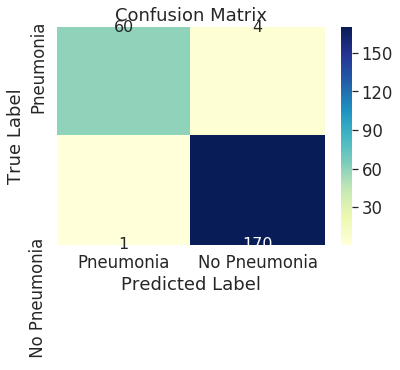

In [0]:
y_pred=model.predict(X_test).round()
x=confusion_matrix(y_test,y_pred)
Cm_df=pd.DataFrame(x,index=['Pneumonia',' No Pneumonia'],columns=['Pneumonia','No Pneumonia'])

sns.set(font_scale=1.5,color_codes=True,palette='deep')
sns.heatmap(Cm_df,annot=True,annot_kws={'size':16},fmt='d',cmap='YlGnBu')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix')

## Saving the model :

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/pneumonia detection/Pneumonia_predictor_model.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/pneumonia detection/Pneumonia_predictor_weigths.h5')

## Conclusion :

We were able to build a deep learning model that is able to identify the cases of Pneumonia with an accuracy of around 97.87%

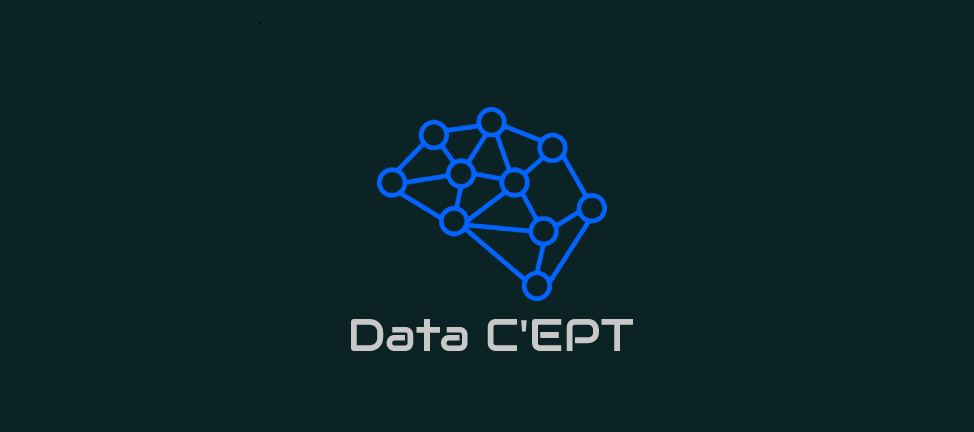